load rnnSMAP
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.11056900024414062
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/testSigma_CONUSv2f1_2017_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/test_CONUSv2f1_2017_2017_ep500.csv


/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/kxf227/work/GitHUB/pyRnnSMAP/rnnSMAP/classPost.py:89: RuntimeWarning: invalid value encountered in greater_equal
  bMat = dmatMC >= dmat
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits

/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f2.csv
skipped rows
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f2/2015/SMAP_AM.csv 0.10243988037109375
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/testSigma_CONUSv2f2_2015_2015_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/test_CONUSv2f2_2015_2015_ep500.csv


/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/kxf227/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/kxf227/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is cu

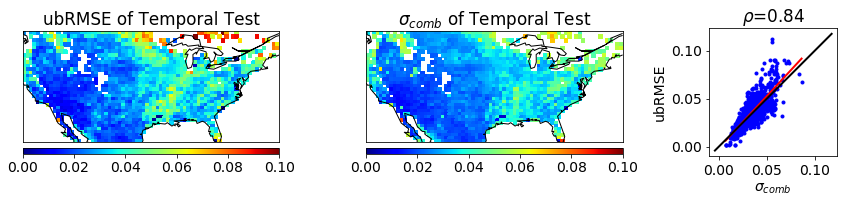

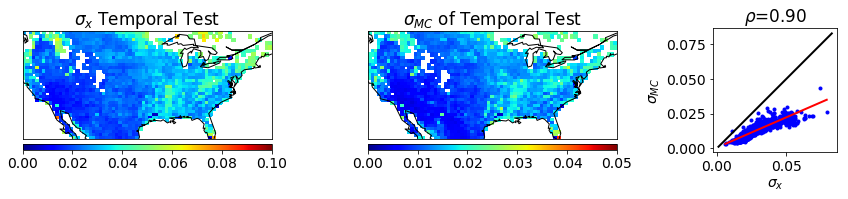

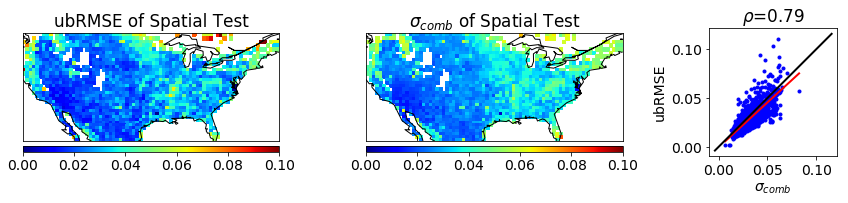

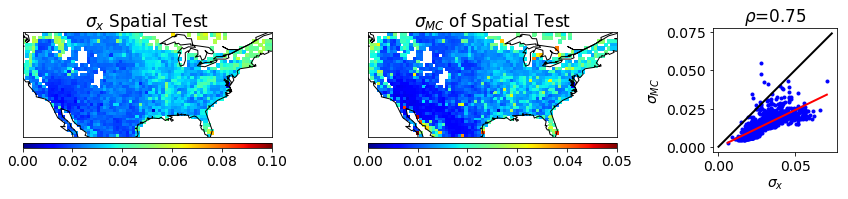

In [7]:
# Figure 1
# %load CONUS_map.py
import os
import rnnSMAP
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

figTitleLst = ['Temporal Test', 'Spatial Test']
figNameLst = ['temporal', 'spatial']

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'lines.linewidth': 2})
matplotlib.rcParams.update({'lines.markersize': 6})


for iFig in range(0, 2):
    # iFig = 0
    figTitle = figTitleLst[iFig]
    if iFig == 0:
        testName = 'CONUSv2f1'
        yr = [2017]
    if iFig == 1:
        testName = 'CONUSv2f2'
        yr = [2015]

    trainName = 'CONUSv2f1'
    out = trainName+'_y15_Forcing_dr60'
    rootDB = rnnSMAP.kPath['DB_L3_NA']
    rootOut = rnnSMAP.kPath['OutSigma_L3_NA']
    caseStrLst = ['sigmaMC', 'sigmaX', 'sigma']
    nCase = len(caseStrLst)
    saveFolder = os.path.join(rnnSMAP.kPath['dirResult'], 'paperSigma')

    #################################################
    # test
    predField = 'LSTM'
    targetField = 'SMAP'

    ds = rnnSMAP.classDB.DatasetPost(
        rootDB=rootDB, subsetName=testName, yrLst=yr)
    ds.readData(var='SMAP_AM', field='SMAP')
    ds.readPred(rootOut=rootOut, out=out, drMC=100, field='LSTM')
    statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
    statSigma = ds.statCalSigma(field='LSTM')
    statConf = ds.statCalConf(predField='LSTM', targetField='SMAP')
    statNorm = rnnSMAP.classPost.statNorm(
        statSigma=statSigma, dataPred=ds.LSTM, dataTarget=ds.SMAP)

    #################################################
    # plot figure
    fig = plt.figure(figsize=[12, 3])
    gs = gridspec.GridSpec(
        1, 3, width_ratios=[1, 1, 0.5], height_ratios=[1])

    dataErr = getattr(statErr, 'ubRMSE')
    dataSigma = getattr(statSigma, 'sigma')
    cRange = [0, 0.1]

    # plot map RMSE
    ax = fig.add_subplot(gs[0, 0])
    grid = ds.data2grid(data=dataErr)
    titleStr = 'ubRMSE of '+figTitle
    rnnSMAP.funPost.plotMap(grid, crd=ds.crdGrid, ax=ax,
                            cRange=cRange, title=titleStr)
    # plot map sigma
    ax = fig.add_subplot(gs[0, 1])
    grid = ds.data2grid(data=dataSigma)
    titleStr = r'$\sigma_{comb}$'+' of '+figTitle
    rnnSMAP.funPost.plotMap(grid, crd=ds.crdGrid, ax=ax,
                            cRange=cRange, title=titleStr)
    fig.show()
    # plot map sigma vs RMSE
    ax = fig.add_subplot(gs[0, 2])
    ax.set_aspect('equal', 'box')
    y = dataErr
    x = dataSigma
    rnnSMAP.funPost.plotVS(
        x, y, ax=ax, xlabel=r'$\sigma_{comb}$', ylabel='ubRMSE')

    fig.tight_layout()
    fig.show()
    saveFile = os.path.join(saveFolder, 'map_'+figNameLst[iFig])
    fig.savefig(saveFile, dpi=100)
    fig.savefig(saveFile+'.eps')

    #################################################
    # plot sigmaX vs sigmaMC
    plotSigma = 1
    if plotSigma == 1:
        fig = plt.figure(figsize=[12, 3])
        gs = gridspec.GridSpec(
            1, 3, width_ratios=[1, 1, 0.5], height_ratios=[1])

        dataSigmaX = getattr(statSigma, 'sigmaX')
        dataSigmaMC = getattr(statSigma, 'sigmaMC')

        # plot map RMSE
        ax = fig.add_subplot(gs[0, 0])
        grid = ds.data2grid(data=dataSigmaX)
        titleStr = r'$\sigma_{x}$ '+figTitle
        rnnSMAP.funPost.plotMap(grid, crd=ds.crdGrid, ax=ax,
                                cRange=[0, 0.1], title=titleStr)

        # plot map sigma
        ax = fig.add_subplot(gs[0, 1])
        grid = ds.data2grid(data=dataSigmaMC)
        titleStr = r'$\sigma_{MC}$'+' of '+figTitle
        rnnSMAP.funPost.plotMap(grid, crd=ds.crdGrid, ax=ax,
                                cRange=[0, 0.05], title=titleStr)

        # plot map sigma vs RMSE
        ax = fig.add_subplot(gs[0, 2])
        ax.set_aspect('equal', 'box')
        y = dataSigmaMC
        x = dataSigmaX
        rnnSMAP.funPost.plotVS(
            x, y, ax=ax, xlabel=r'$\sigma_{x}$', ylabel=r'$\sigma_{MC}$')

        fig.tight_layout()
        fig.show()
        saveFile = os.path.join(saveFolder, 'map_'+figNameLst[iFig]+'_sigma')
        fig.savefig(saveFile, dpi=100)
        fig.savefig(saveFile+'.eps')


load rnnSMAP
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.11625170707702637
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/testSigma_CONUSv2f1_2016_2016_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/test_CONUSv2f1_2016_2016_ep500.csv


/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/kxf227/work/GitHUB/pyRnnSMAP/rnnSMAP/classPost.py:89: RuntimeWarning: invalid value encountered in greater_equal
  bMat = dmatMC >= dmat
/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.09821462631225586
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/testSigma_CONUSv2f1_2017_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing_dr60/test_CONUSv2f1_2017_2017_ep500.csv
[0.029101862792387974, 0.13510648855724189, 0.010268645457930067]
[0.049918706104008899, 0.14211736225603649, 0.015542426207410176]


<Figure size 432x288 with 0 Axes>

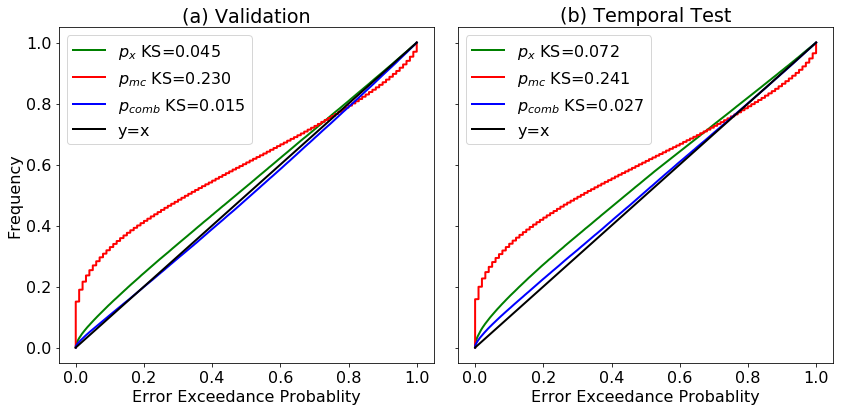

In [5]:
# %load CONUS_conf.py
# Figure 2
import os
import rnnSMAP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

trainName = 'CONUSv2f1'
out = trainName+'_y15_Forcing_dr60'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['OutSigma_L3_NA']
saveFolder = os.path.join(rnnSMAP.kPath['dirResult'], 'paperSigma')

doOpt = []
doOpt.append('loadData')
doOpt.append('plotConf')
# doOpt.append('plotBin')
# doOpt.append('plotProb')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'lines.linewidth': 2})
matplotlib.rcParams.update({'lines.markersize': 10})
plt.tight_layout()

#################################################
# load data
if 'loadData' in doOpt:
    dsLst = list()
    statErrLst = list()
    statSigmaLst = list()
    statConfLst = list()
    statProbLst = list()

    for k in range(0, 2):
        if k == 0:  # validation
            testName = 'CONUSv2f1'
            yr = [2016]
        if k == 1:  # temporal test
            testName = 'CONUSv2f1'
            yr = [2017]
        # if k == 2:  # spatial test
        #     testName = 'CONUSv2fx2'
        #     yr = [2015]

        predField = 'LSTM'
        targetField = 'SMAP'
        ds = rnnSMAP.classDB.DatasetPost(
            rootDB=rootDB, subsetName=testName, yrLst=yr)
        ds.readData(var='SMAP_AM', field='SMAP')
        ds.readPred(rootOut=rootOut, out=out, drMC=100, field='LSTM')
        statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
        statSigma = ds.statCalSigma(field='LSTM')
        statConf = ds.statCalConf(
            predField='LSTM', targetField='SMAP', rmBias=True)
        statProb = ds.statCalProb(predField='LSTM', targetField='SMAP')
        dsLst.append(ds)
        statErrLst.append(statErr)
        statSigmaLst.append(statSigma)
        statConfLst.append(statConf)
        statProbLst.append(statProb)

#################################################
# plot confidence figure
if 'plotConf' in doOpt:
    figTitleLst = ['(a) Validation', '(b) Temporal Test']
    fig, axes = plt.subplots(
        ncols=len(figTitleLst), figsize=(12, 6), sharey=True)
    sigmaStrLst = ['sigmaX', 'sigmaMC', 'sigma']
    legendLst = [r'$p_{x}$', r'$p_{mc}$', r'$p_{comb}$']
    for iFig in range(0, 2):
        statConf = statConfLst[iFig]
        figTitle = figTitleLst[iFig]
        plotLst = list()
        for k in range(0, len(sigmaStrLst)):
            plotLst.append(getattr(statConf, 'conf_'+sigmaStrLst[k]))
        
        _, _, out = rnnSMAP.funPost.plotCDF(
            plotLst, ax=axes[iFig], legendLst=legendLst, cLst='grbm',
            xlabel='Error Exceedance Probablity', ylabel=None, showDiff='KS')
        axes[iFig].set_title(figTitle)
        print(out['rmseLst'])        
    axes[0].set_ylabel('Frequency')
    # axes[1].get_legend().remove()
    fig.tight_layout()
#     fig.show()
#     saveFile = os.path.join(saveFolder, 'CONUS_conf')
#     fig.savefig(saveFile, dpi=100)
#     fig.savefig(saveFile+'.eps')



load rnnSMAP
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM.csv 0.0350651741027832
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr60/testSigma_CONUSv4f1_2017_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr60/test_CONUSv4f1_2017_2017_ep500.csv


/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/kxf227/work/GitHUB/pyRnnSMAP/rnnSMAP/classPost.py:89: RuntimeWarning: invalid value encountered in greater_equal
  bMat = dmatMC >= dmat


/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM_sn1e2.csv 0.025993824005126953
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr06_sn1e2/testSigma_CONUSv4f1_2017_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr06_sn1e2/test_CONUSv4f1_2017_2017_ep500.csv
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM_sn2e2.csv 0.026444196701049805
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr06_sn2e2/testSigma_CONUSv4f1_2017_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv4f1_y15_Forcing_dr06_sn2e2/test_CONUSv4f1_2017_2017_ep500.csv
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv4f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv4f1/2017/SMAP_AM_sn3e2.csv 0.026

/home/kxf227/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


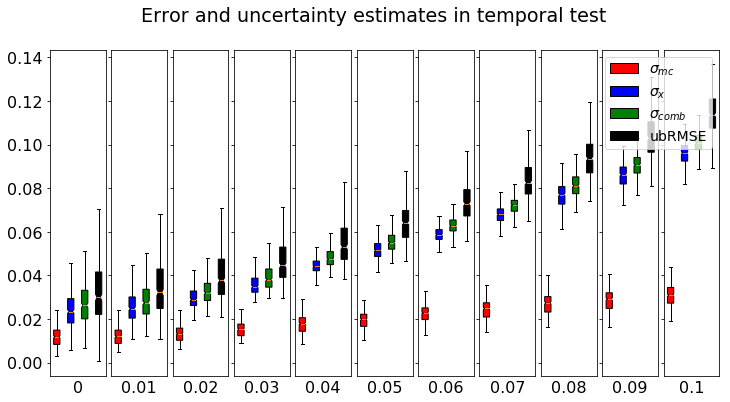

In [15]:
# %load CONUSv4_noise.py
import os
import rnnSMAP
from rnnSMAP import runTrainLSTM
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

#################################################
# noise affact on sigmaX (or sigmaMC)
doOpt = []
# doOpt.append('train')
doOpt.append('test')
# doOpt.append('plotMap')
doOpt.append('plotErrBox')
# doOpt.append('plotConf')
# doOpt.append('plotConfDist')
# doOpt.append('plotConfLegend')
#
# noiseNameLst = ['0', '5e3', '1e2', '2e2', '5e2', '1e1']

noiseNameLst = ['0', '1e2', '2e2', '3e2', '4e2', '5e2',
                '6e2', '7e2', '8e2', '9e2', '1e1']
noiseLabelLst = ['0', '0.01', '0.02', '0.03', '0.04', '0.05',
                 '0.06', '0.07', '0.08', '0.09', '0.1']
strErrLst = ['RMSE', 'ubRMSE']
saveFolder = os.path.join(
    rnnSMAP.kPath['dirResult'], 'paperSigma')
rootDB = rnnSMAP.kPath['DB_L3_NA']

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'lines.linewidth': 2})
matplotlib.rcParams.update({'lines.markersize': 10})
matplotlib.rcParams.update({'legend.fontsize': 14})


#################################################
if 'test' in doOpt:
    statErrLst = list()
    statSigmaLst = list()
    statConfLst = list()
    for k in range(0, len(noiseNameLst)):
        testName = 'CONUSv4f1'
        if k == 0:
            out = 'CONUSv4f1_y15_Forcing_dr60'
            targetName = 'SMAP_AM'
        else:
            out = 'CONUSv4f1_y15_Forcing_dr06_sn'+noiseNameLst[k]
            targetName = 'SMAP_AM_sn'+noiseNameLst[k]

        rootOut = rnnSMAP.kPath['OutSigma_L3_NA']
        caseStrLst = ['sigmaMC', 'sigmaX', 'sigma']
        ds = rnnSMAP.classDB.DatasetPost(
            rootDB=rootDB, subsetName=testName, yrLst=[2017])
        ds.readData(var=targetName, field='SMAP')
        ds.readPred(out=out, drMC=100, field='LSTM', rootOut=rootOut)

        statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
        statErrLst.append(statErr)
        statSigma = ds.statCalSigma(field='LSTM')
        statSigmaLst.append(statSigma)
        statConf = ds.statCalConf(predField='LSTM', targetField='SMAP')
        statConfLst.append(statConf)

#################################################
if 'plotErrBox' in doOpt:
    data = list()
    strErr = 'ubRMSE'
    strSigmaLst = ['sigmaMC', 'sigmaX', 'sigma']
    labelS = [r'$\sigma_{mc}$', r'$\sigma_x$', r'$\sigma_{comb}$', 'ubRMSE']
    for k in range(0, len(noiseNameLst)):
        temp = list()
        for strSigma in strSigmaLst:
            temp.append(getattr(statSigmaLst[k], strSigma))
        temp.append(getattr(statErrLst[k], strErr))
        data.append(temp)

    fig = rnnSMAP.funPost.plotBox(
        data, labelC=noiseLabelLst, figsize=(12, 6), colorLst='rbgk',
        labelS=labelS, title='Error and uncertainty estimates in temporal test')

    # axes[-1].get_legend().remove()
    fig.show()
    saveFile = os.path.join(saveFolder, 'noise_box')
    fig.subplots_adjust(wspace=0.1)
    fig.savefig(saveFile, dpi=100)
    fig.savefig(saveFile+'.eps')

    # figLeg, axLeg = plt.subplots(figsize=(3, 3))
    # leg = axes[-1].get_legend()
    # axLeg.legend(bp['boxes'], labelS, loc='upper right')
    # axLeg.axis('off')
    # figLeg.show()
    # saveFile = os.path.join(saveFolder, 'noise_box_legend')
    # figLeg.savefig(saveFile+'.eps')


#################################################
if 'plotConf' in doOpt:
    strSigmaLst = ['sigmaMC', 'sigmaX', 'sigma']
    titleLst = [r'$p_{mc}$', r'$p_{x}$', r'$p_{comb}$']
    fig, axes = plt.subplots(ncols=len(titleLst),
                             figsize=(12, 4), sharey=True)
    for iFig in range(0, 3):
        plotLst = list()
        for k in range(0, len(noiseNameLst)):
            plotLst.append(getattr(statConfLst[k], 'conf_'+strSigmaLst[iFig]))
        if iFig == 2:
            _, _, out = rnnSMAP.funPost.plotCDF(
                plotLst, ax=axes[iFig], legendLst=noiseLabelLst,
                xlabel='Predicted Probablity', ylabel=None, showDiff=True)
        else:
            _, _, out = rnnSMAP.funPost.plotCDF(
                plotLst, ax=axes[iFig], legendLst=None,
                xlabel='Predicted Probablity', ylabel=None, showDiff=True)
        axes[iFig].set_title(titleLst[iFig])
        print(out['rmseLst'])
        if iFig == 0:
            axes[iFig].set_ylabel('Frequency')

    saveFile = os.path.join(saveFolder, 'noise_conf')
    plt.tight_layout()
    fig.savefig(saveFile, dpi=100)
    fig.savefig(saveFile+'.eps')
    fig.show()

#################################################
if 'plotConfDist' in doOpt:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    strSigmaLst = ['sigmaMC', 'sigmaX']
    titleLst = [r'CDF of $p_{mc}$', r'CDF of $p_{x}$']
    for iFig in range(0, 2):
        plotLst = list()
        for k in range(0, len(noiseNameLst)):
            plotLst.append(getattr(statConfLst[k], 'conf_'+strSigmaLst[iFig]))
        _, _, out = rnnSMAP.funPost.plotCDF(
            plotLst, ax=axes[iFig], legendLst=None,
            xlabel=r'$P_{ee}$', ylabel=None, showDiff=False)
        axes[iFig].set_title(titleLst[iFig])
        print(out['rmseLst'])
        if iFig == 0:
            axes[iFig].set_ylabel('Frequency')
    noiseLst = np.arange(0, 0.11, 0.01)
    strSigmaLst = ['sigmaMC', 'sigmaX']
    legLst = [r'$d(p_{mc})$', r'$d(p_{x})$']
    cLst = 'rb'
    axesDist = [axes[2], axes[2].twinx()]
    for iS in range(0, len(strSigmaLst)):
        distLst = list()
        for iN in range(0, len(noiseNameLst)):
            x = getattr(statConfLst[iN], 'conf_'+strSigmaLst[iS])
            # calculate dist of CDF
            xSort = rnnSMAP.funPost.flatData(x)
            yRank = np.arange(len(xSort))/float(len(xSort)-1)
            dist = np.max(np.abs(xSort - yRank))
            distLst.append(dist)
        axesDist[iS].plot(noiseLst, distLst, color=cLst[iS], label=legLst[iS])
        axesDist[iS].tick_params('y', colors=cLst[iS])
    axesDist[0].set_xlabel(r'$\sigma_{noise}$')
    axesDist[0].legend(loc='upper center')
    axesDist[1].legend(loc='lower center')
    axesDist[0].set_title(r'd to $y=x$')
    plt.tight_layout()
    saveFile = os.path.join(saveFolder, 'noise_dist')
    fig.savefig(saveFile, dpi=100)
    fig.savefig(saveFile+'.eps')
    fig.show()

#################################################
if 'plotConfLegend' in doOpt:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    strSigmaLst = ['sigmaMC', 'sigmaX']
    titleLst = [r'CDF of $p_{mc}$', r'CDF of $p_{x}$']
    plotLst = list()
    for k in range(0, len(noiseNameLst)):
        plotLst.append(getattr(statConfLst[k], 'conf_'+strSigmaLst[iFig]))
    _, _, out = rnnSMAP.funPost.plotCDF(
        plotLst, ax=axes[0], legendLst=noiseLabelLst,
        xlabel=r'$P_{ee}$', ylabel=None, showDiff=False)

    hh, ll = axes[0].get_legend_handles_labels()
    axes[1].legend(hh, ll, borderaxespad=0, loc='lower left', ncol=1)
    axes[1].axis('off')
    saveFile = os.path.join(saveFolder, 'noise_dist_leg')
    fig.savefig(saveFile, dpi=100)
    fig.savefig(saveFile+'.eps')
    fig.show()
